In [1]:
## IMPORTY
# wykresy będą wyświetlać się w notebooku nie osobnych oknach
%matplotlib inline
# biblioteka do rysowania wykresów
import matplotlib.pyplot as plt
# schematy kolorów
from matplotlib import cm
# moduły do generowania danych i obrabiania
from sklearn.datasets import make_blobs, load_iris
import numpy as np

In [2]:
## GENEROWANIE DANYCH
blobs_X, blobs_y = make_blobs()
x = np.linspace(-10, 10,)
sin_X, sin_y = x, np.sin(x)
iris = load_iris()
iris_X, iris_y = iris.data, iris.target

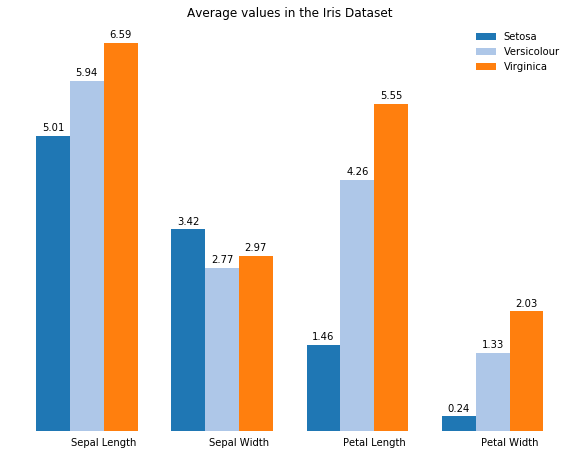

In [3]:
# Zbiór iris opisuje irysy trzech gatunków.
# Każda kolumna w iris.data zawiera informację o wielkości danej cechy konkretnego kwiatu.
# iris.target zawiera informację o gatunku konkretnego irysa

# informację o każdym gatunku będziemy trzymać w osobnej macierzy
iris_0 = iris_X[iris_y==0]
iris_1 = iris_X[iris_y==1]
iris_2 = iris_X[iris_y==2]

# wyliczamy średnią każdej cechy dla każdego gatunku
mean_0 = np.mean(iris_0, axis=0)
mean_1 = np.mean(iris_1, axis=0)
mean_2 = np.mean(iris_2, axis=0)

# Oto są kolory "Tableau 20" w RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Przeskaluj wartości RGB to skali [0, 1], by była akceptowana przez matplotliba.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

    
plt.figure(figsize=(10, 7.5)) 
ax = plt.subplot()

# zmienne, potrzebne do ustawienia słupków obok siebie
N = len(mean_0)
ind = np.arange(N)
width = 1./N

# właściwe rysowanie
rects0 = ax.bar(ind, mean_0, width, color=tableau20[0], edgecolor = "none")
rects1 = ax.bar(ind+width, mean_1, width, color=tableau20[1], edgecolor = "none")
rects2 = ax.bar(ind+2*width, mean_2, width, color=tableau20[2], edgecolor = "none")

# legenda
ax.legend((rects0[0], rects1[0], rects2[0]), ('Setosa', 'Versicolour', 'Virginica'), frameon=False)

# podpisanie diagramu
ax.set_title('Average values in the Iris Dataset')

# ustawiamy podpisy w osi X
ax.set_xticks(ind + 1.5 * width)
ax.set_xticklabels(('Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'))

# chcemy nie mieć ticksów
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top='off',         # ticks along the top edge are off
    bottom='off',      # ticks along the bottom edge are off
    labelbottom='on')  # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left='off',        # ticks along the left edge are off
    right='off',       # ticks along the right edge are off
    labelleft='off')   # labels along the bottom edge are off


# Remove the plot frame lines. They are unnecessary chartjunk.    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

# wartość reprezentowana przez słupek zostanie wyświetlona nad słupkiem
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.05+height,
                '%.2f' % (height),
                ha='center', va='bottom')

autolabel(rects0)
autolabel(rects1)
autolabel(rects2)